# OBJECT TRACKING

The method of object tracking is broken down into a 3 step approach:
1. Sequentially read two frames from the video
2. Compare the two frames and segment the pixels which have changed between the 2 images.
3. Use thresholding and smoothning techniques to get the boundary of the object of interest.

**NOTES**:
* We need to take the **absolute difference between the pixels** of subsequent images and apply thresholding and smoothing to the difference images. The absolute difference represents the pixels that have changed between the 2 images.
* The smoothing/blurring is required to **eliminate the region of overlap** between the images.

# 1. FRAME EXTRACTION

In [1]:
'''
Import useful libraries
'''
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import datetime
import csv
import pandas as pd

matplotlib.style.use('ggplot')
cv2.setUseOptimized(True)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''
Importing Video file
'''
video = './Data/walk.avi'
capture = cv2.VideoCapture(video)
print capture.isOpened() # should return True only, else configure ffmpeg

True


In [3]:
'''
Frame & Frame rate
'''
total_frames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
print 'Total number of frames in the video:', int(total_frames)

frame_rate = capture.get(cv2.CAP_PROP_FPS)
print 'Frame rate of the video: ', frame_rate

Total number of frames in the video: 83
Frame rate of the video:  25.0


In [4]:
'''
Play video (press q to quit)
'''
while(capture.isOpened()):
    
    current_frame = int(capture.get(cv2.CAP_PROP_POS_FRAMES))
    
    if (current_frame >= total_frames):
            break

    ret, frame = capture.read()
    
    cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
    cv2.imshow('frame', frame)
        
    # press q to quit the video
    if cv2.waitKey(120) & 0xFF == ord('q'): 
        break
    
# end video
capture.release()
cv2.destroyAllWindows()

In [5]:
'''
Extracting frames
'''
video = './Data/shahar_walk.avi'
capture = cv2.VideoCapture(video)

count = 0
success = True

while success:
    success, image = capture.read()
    print 'Read a new frame: ', success
    cv2.imwrite("frame_walk%d.jpg" % count, image)# save frame as JPEG file
    
    if cv2.waitKey(10) == 1: # exit if Escape is hit
        break
        
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [6]:
'''
Using median frame for further analysis
'''
image1 = cv2.imread('./Data/frame_walk43.jpg')
image2 = cv2.imread('./Data/frame_walk44.jpg')

# 2. FRAME COMPARISON AND PREPROCESSING

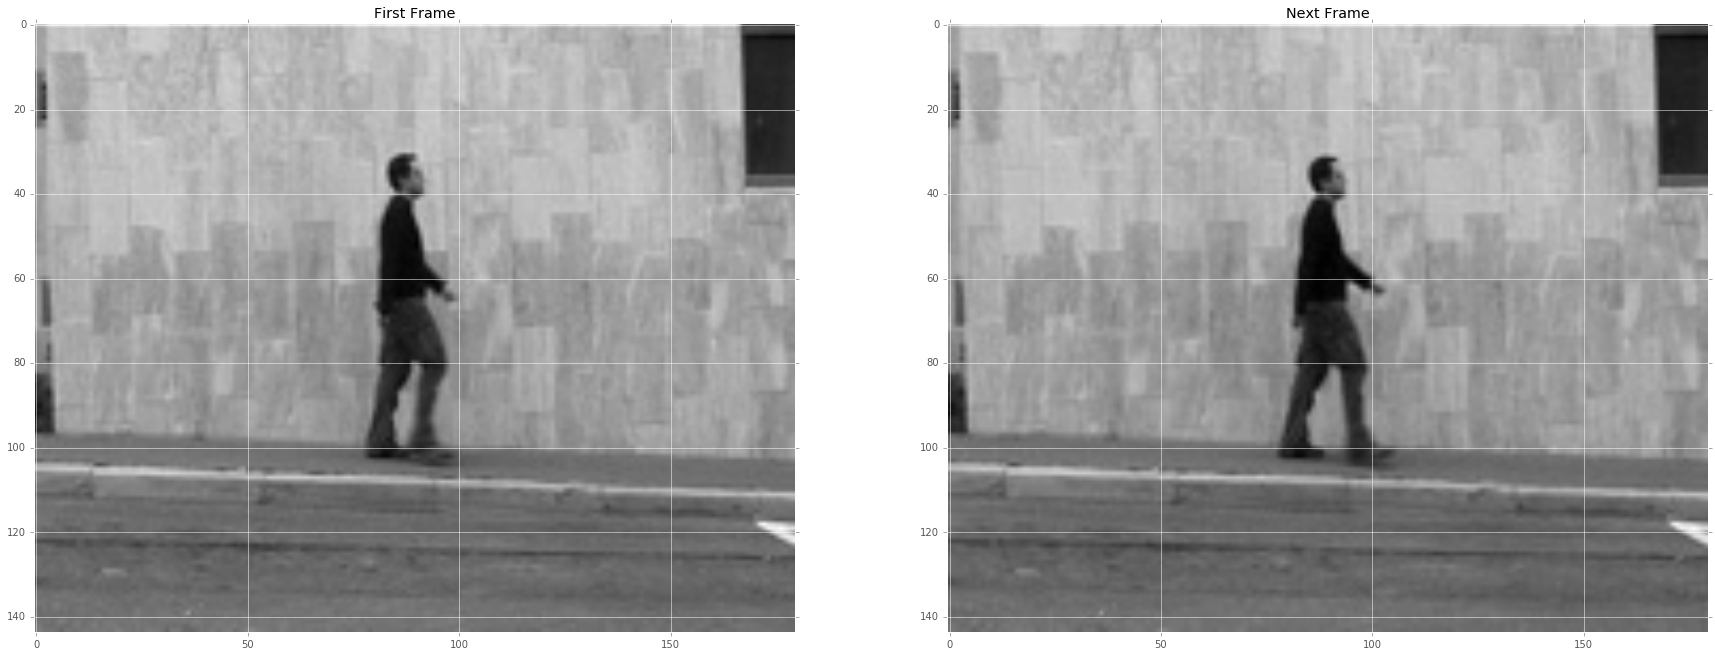

In [7]:
'''
Display gray scale frames
'''
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(30,15))

plt.subplot(121)
plt.imshow(gray1, 'gray')
plt.title('First Frame')

plt.subplot(122)
plt.imshow(gray2, 'gray')
plt.title('Next Frame')

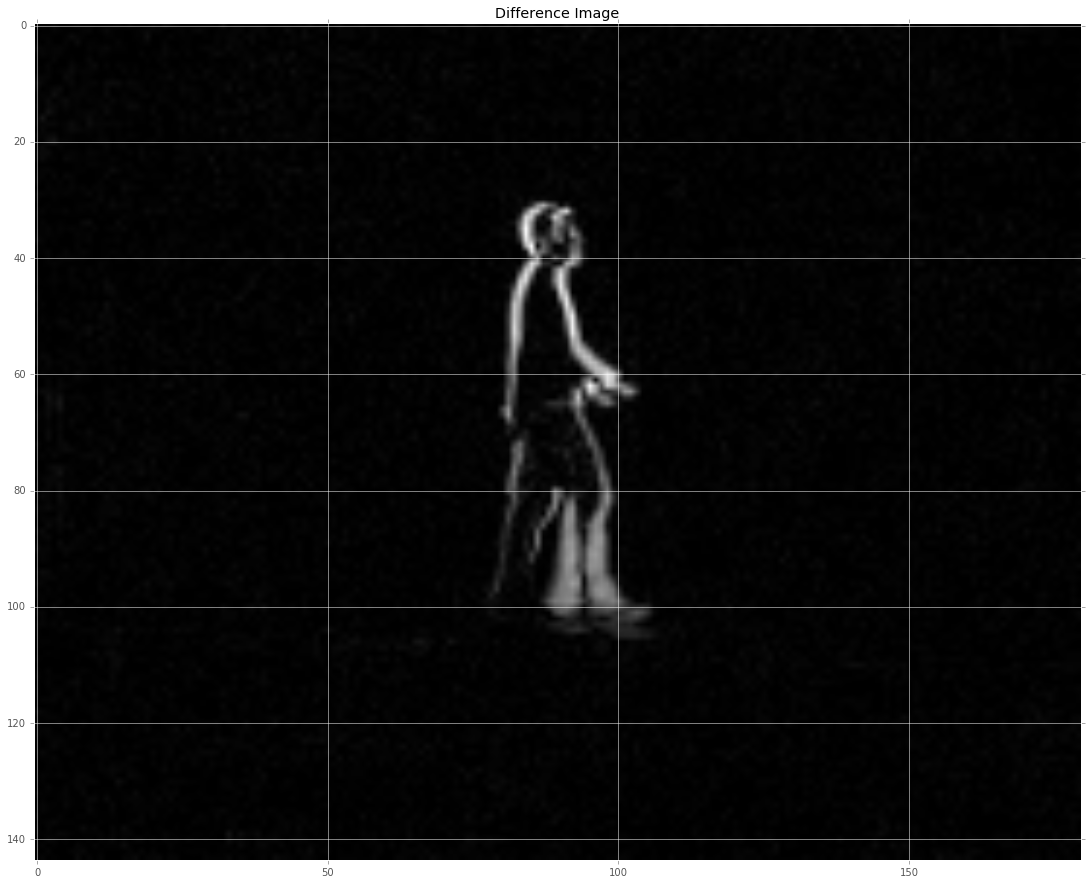

In [8]:
'''
Calculate and display difference image
'''
differenceImage = cv2.absdiff(gray1, gray2) # outputs an intensity difference image

plt.figure(figsize=(30,15))

plt.imshow(differenceImage, 'gray')
plt.title('Difference Image')

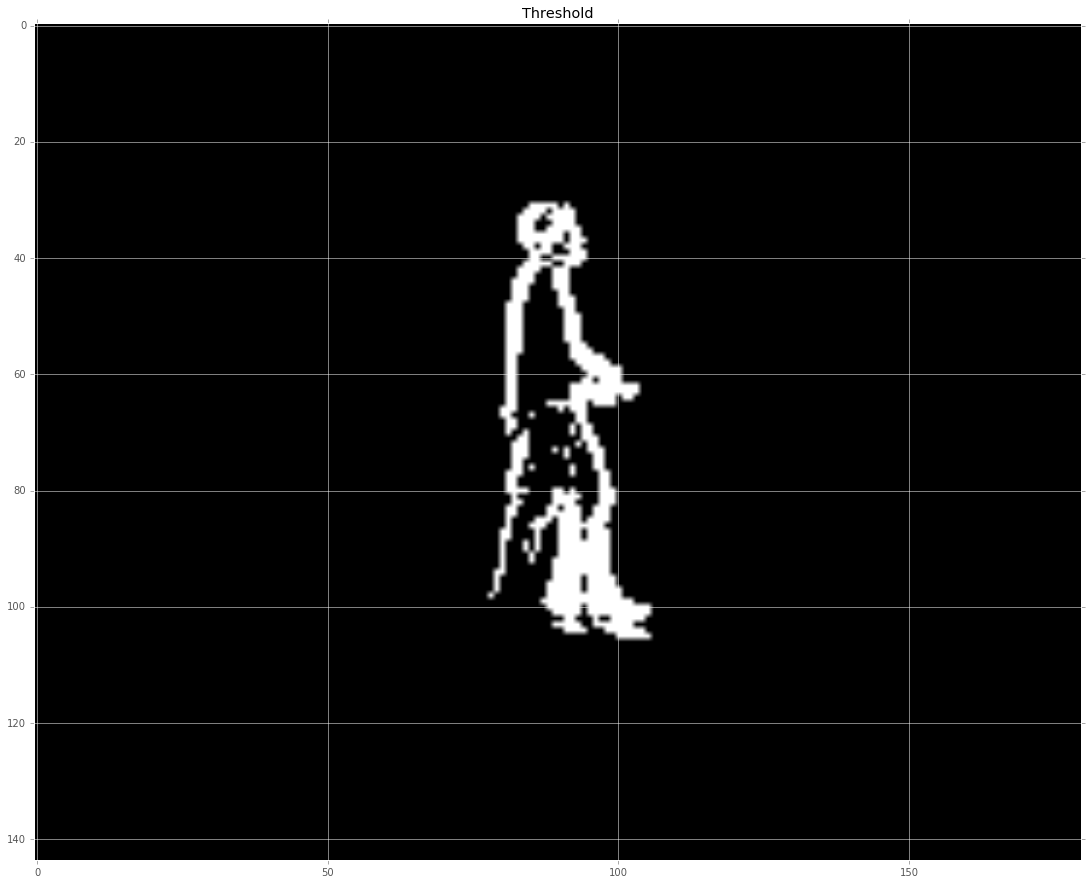

In [9]:
'''
Apply binary thresholding to the difference image in order to segment the object
'''
ret,thresh = cv2.threshold(differenceImage, 13, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(30,15))

plt.imshow(thresh, 'gray')
plt.title('Threshold')

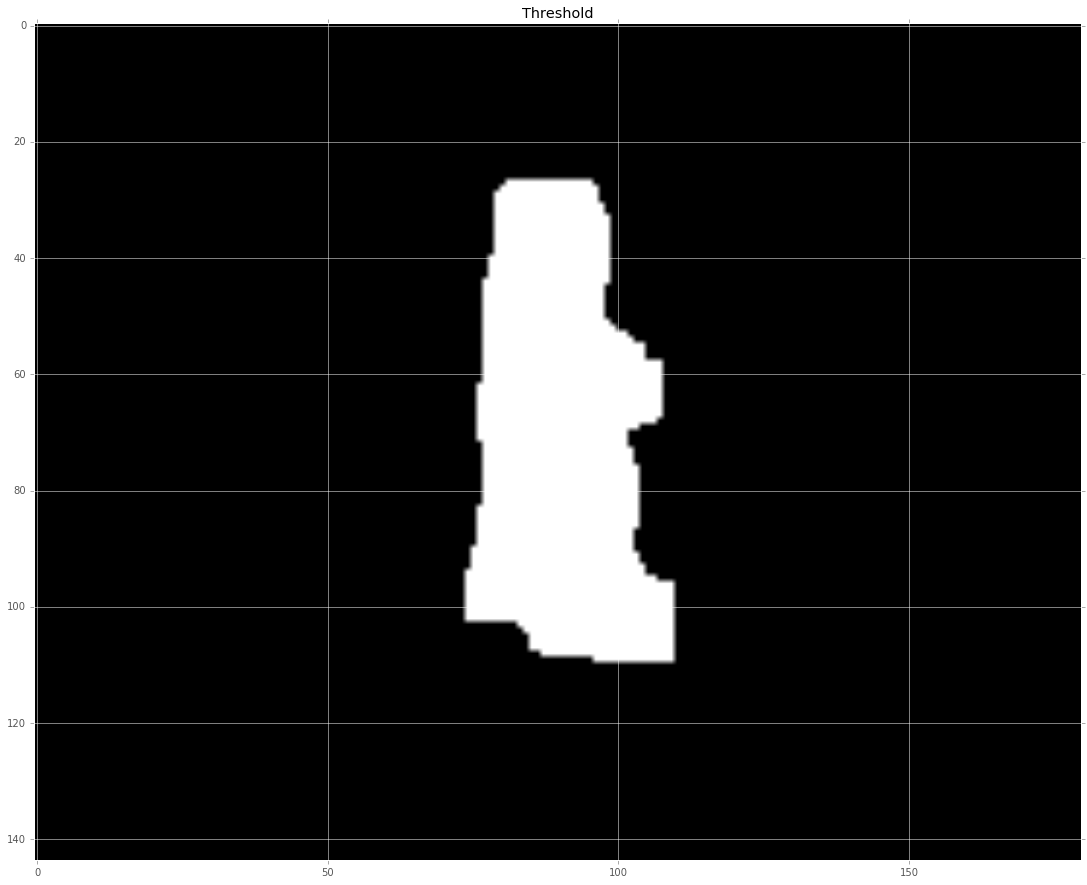

In [10]:
'''
Apply dilation to cover the whole object area
'''
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations = 2)

plt.figure(figsize=(30,15))

plt.imshow(dilation, 'gray')
plt.title('Threshold')

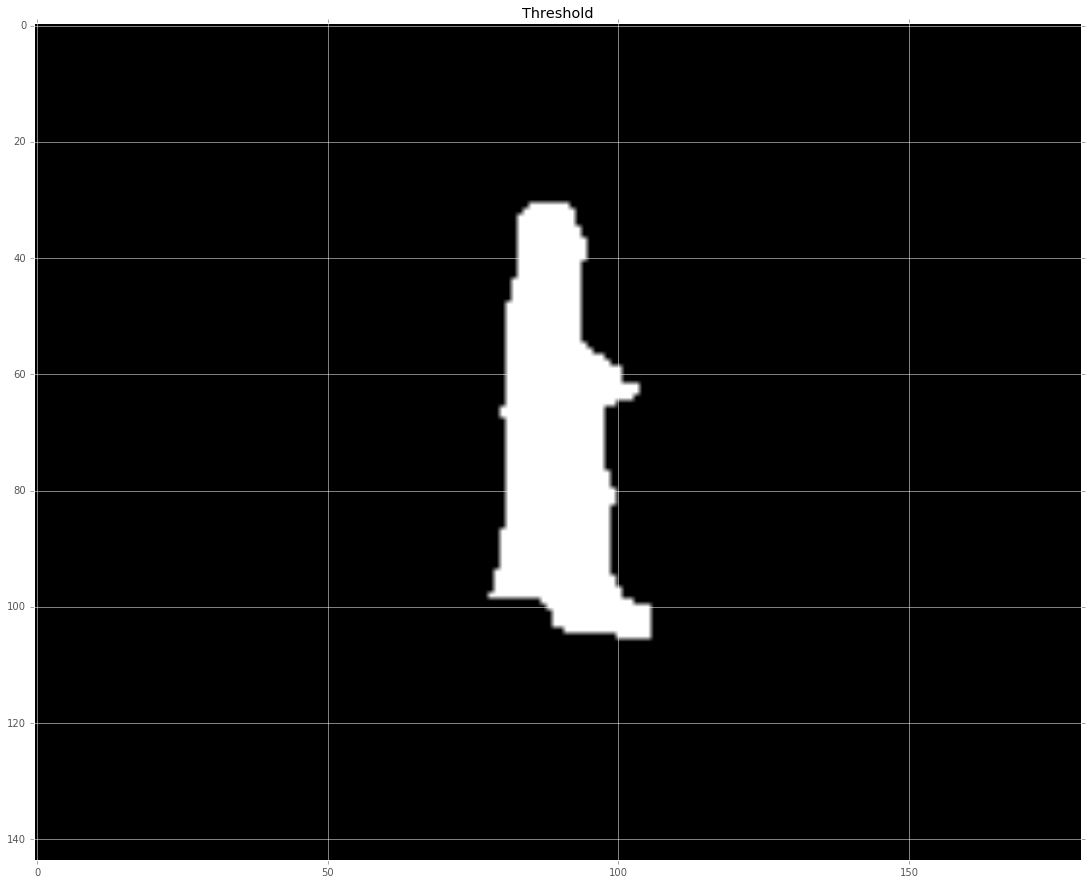

In [11]:
'''
Apply erosion to reduce the unwanted dilated area and approximate the object shape
'''
kernel = np.ones((3,3),np.uint8)
erode = cv2.erode(dilation,kernel,iterations = 4)

plt.figure(figsize=(30,15))

plt.imshow(erode, 'gray')
plt.title('Threshold')

# 3. OBJECT IDENTIFICATION

In [12]:
'''
Find all contours
'''
ll, contours, hierarchy = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #check the params

In [13]:
'''
Draw Countours
'''
cv2.drawContours(image2, contours, -1, (0,255,0), -1)

array([[[179, 182, 187],
        [189, 187, 193],
        [195, 188, 195],
        ..., 
        [ 68,  63,  60],
        [ 69,  64,  61],
        [ 70,  65,  62]],

       [[143, 146, 151],
        [145, 143, 149],
        [155, 148, 155],
        ..., 
        [ 76,  72,  67],
        [ 77,  73,  68],
        [ 78,  74,  69]],

       [[146, 149, 154],
        [144, 142, 148],
        [154, 147, 154],
        ..., 
        [ 61,  58,  50],
        [ 63,  60,  52],
        [ 63,  60,  52]],

       ..., 
       [[116, 105, 108],
        [117, 106, 109],
        [117, 106, 109],
        ..., 
        [116, 102, 104],
        [109,  95,  97],
        [111,  97,  99]],

       [[122, 111, 114],
        [122, 111, 114],
        [117, 106, 109],
        ..., 
        [117, 103, 105],
        [113,  99, 101],
        [116, 102, 104]],

       [[123, 111, 117],
        [123, 111, 117],
        [119, 108, 111],
        ..., 
        [117, 104, 106],
        [111,  98, 100],
        [113, 100,

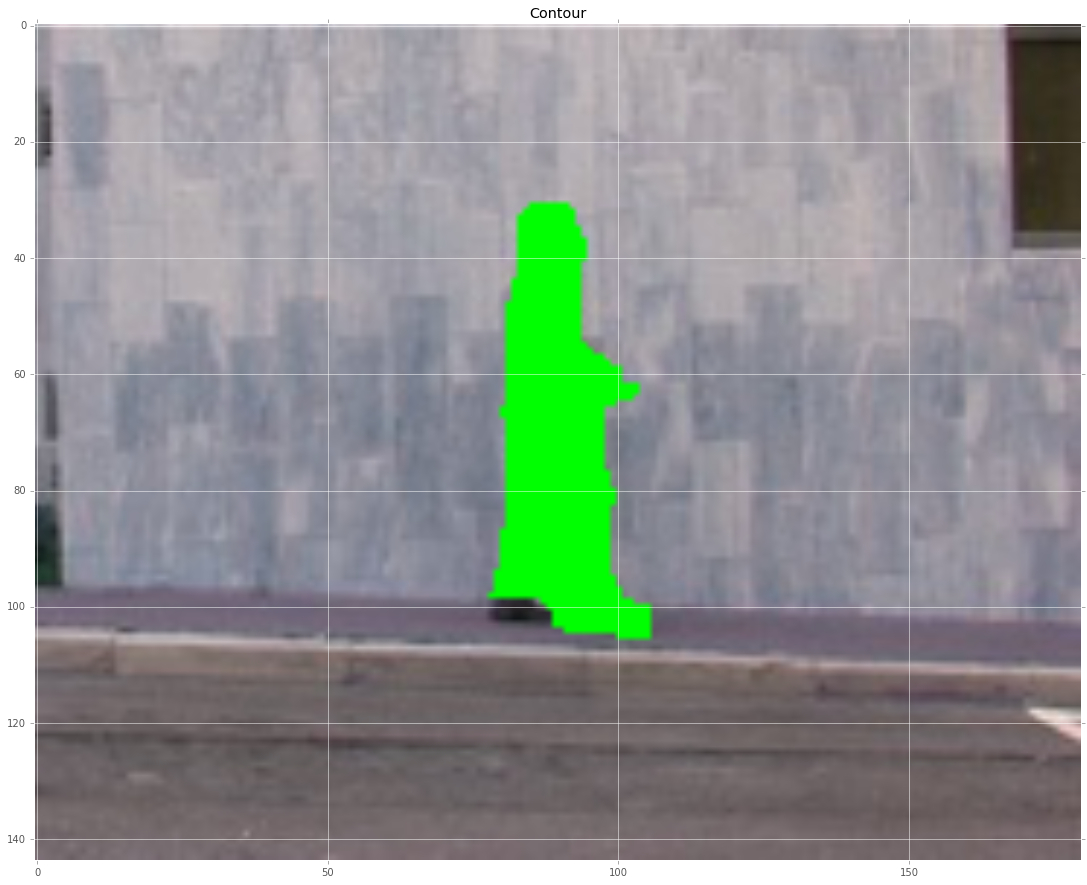

In [15]:
'''
Show contour image
'''
plt.figure(figsize=(30,15))
plt.imshow(image2, 'gray')
plt.title('Contour')

In [16]:
'''
Display contour information
'''
print 'Number of Contours found: ', len(contours)
# print '\n'
# print contours[0]

Number of Contours found:  1


In [17]:
'''
Differentiate contours on the basis of the area
'''
areas = np.empty((0,len(contours)))

for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    areas = np.append(areas, area)

print 'Areas of different contours: ', areas
max_area = max(areas)

index = [i for i, j in enumerate(areas) if j == max_area]
print 'Contour position with the max area: ', index

Areas of different contours:  [ 1113.]
Contour position with the max area:  [0]


In [18]:
'''
Add centroid
'''
cnt = contours[index[0]]

# Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.
x,y,w,h = cv2.boundingRect(cnt)
print 'x coordinate top-left: ', x
print 'y coordinate top-left: ', y
print 'width of the rectangle: ', w
print 'height of the rectangle: ', h

print '\n'

print 'Centroid of the Rectangle: '
centerx = (x+ (w/2))
centery = (y+ (h/2))

print 'x-coordinate of the centroid: ', centerx
print 'y-coordinate of the centroid: ', centery

x coordinate top-left:  78
y coordinate top-left:  31
width of the rectangle:  28
height of the rectangle:  75


Centroid of the Rectangle: 
x-coordinate of the centroid:  92
y-coordinate of the centroid:  68


(<matplotlib.image.AxesImage at 0x114c0350>,
 <matplotlib.text.Text at 0x113c1190>)

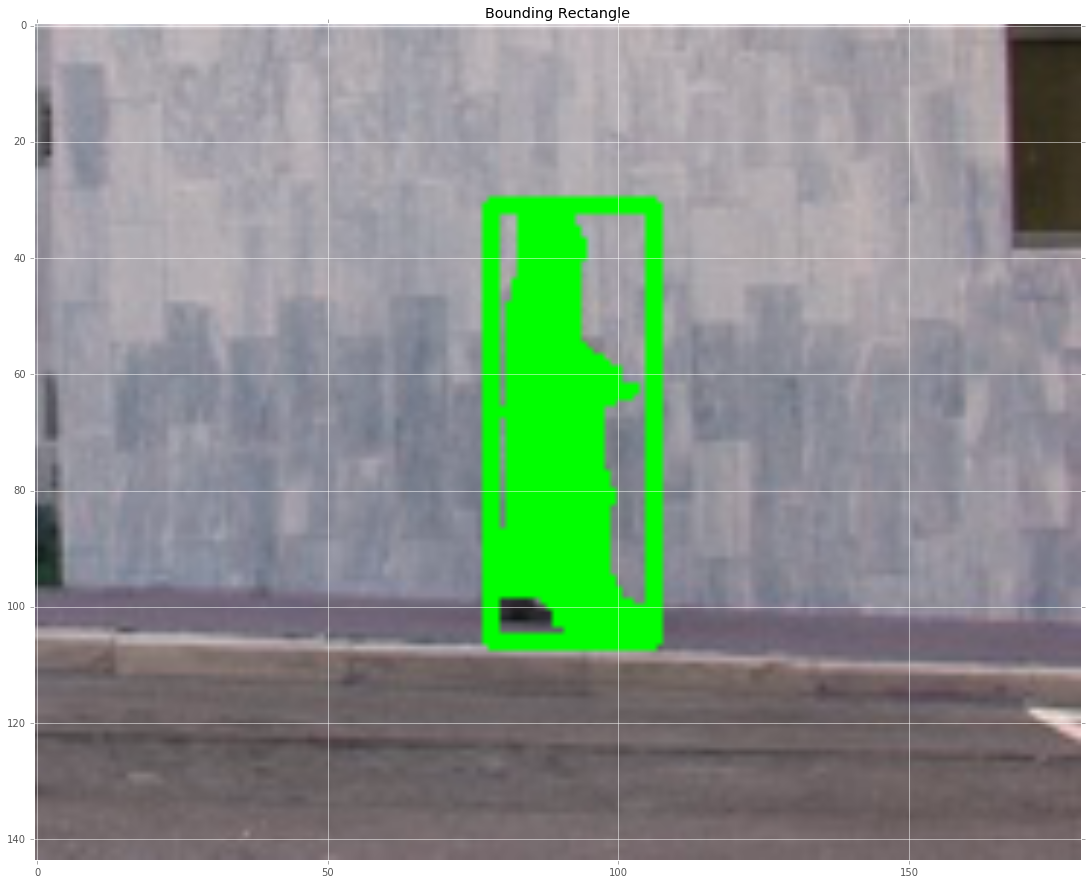

In [19]:
plt.figure(figsize=(30,15))
cv2.rectangle(image2,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(image2),plt.title('Bounding Rectangle')

(<matplotlib.image.AxesImage at 0x11578090>,
 <matplotlib.text.Text at 0x11553eb0>)

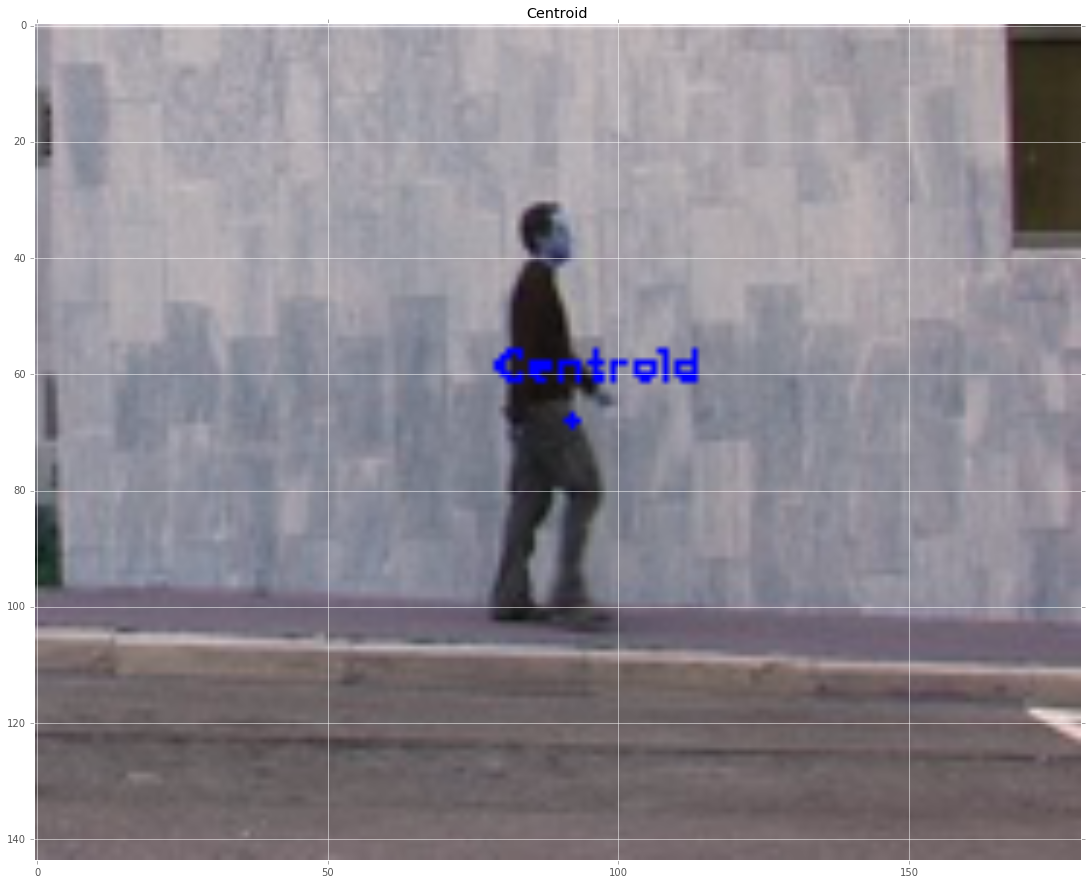

In [20]:
'''
Tracking Centroid
'''
cv2.circle(image1,(int(centerx),int(centery)), 1, (0,0,255), -1)
cv2.putText(image1, "Centroid", (int(x),int(y+30)), 1, 0.5, (0,0,255),1,1)

plt.figure(figsize=(30,15))
plt.imshow(image1),plt.title('Centroid')

# 4. VIDEO DEMO

Perform all the above steps on the video. Executing the code below will play the video in a pop-up window.

In [21]:
'''
Apply above analysis on the video
'''

video = './Data/shahar_walk.avi'
capture = cv2.VideoCapture(video)

counter = 0
sensitivity_value = 13

# open file to write centroid coordindates
f = open('object_position.txt', 'w')

# total frames
total_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))


while(True):
    
    # current frame
    current_frame = int(capture.get(cv2.CAP_PROP_POS_FRAMES))
    
    if (current_frame >= total_frames):
            break
    
    # read frame 1
    ret1, frame1 = capture.read() 
    
    # convert color to gray before capturing second frame to avoid delay
    grayImage1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    
    # read frame 2
    ret2, frame2 = capture.read()
    
    # convert frame2 color to gray
    grayImage2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    # apply differences
    differenceImage = cv2.absdiff(grayImage1, grayImage2) # outputs an intensity difference image
    
    # threshold required to get just black and white
    ret,thresh = cv2.threshold(differenceImage, sensitivity_value, 255, cv2.THRESH_BINARY)
    
    # debug: show threshold image and difference image for comparison
    #cv2.namedWindow('thresh', cv2.WINDOW_NORMAL)
    #cv2.imshow('thresh', thresh)
    
    #cv2.namedWindow('diff', cv2.WINDOW_NORMAL)
    #cv2.imshow('diff', differenceImage)
    
    # reduce blur (averaging image filtering technique)
    #thresh = cv2.blur(thresh, (2,2))
    
    # threshold again because blur outputs an intensity image
    ret,thresh = cv2.threshold(thresh, sensitivity_value, 255, cv2.THRESH_BINARY)
    
    # apply morphological smoothing
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(thresh, kernel, iterations = 2)
    kernel = np.ones((3,3),np.uint8)
    erode = cv2.erode(dilation,kernel,iterations = 4)

    # create contour
    ll, contours, hierarchy = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #check the params
       
    # find countour of interest
    areas = np.empty((0,len(contours)))

    for i, c in enumerate(contours):
        area = cv2.contourArea(c)
        areas = np.append(areas, area)
    
    max_area = max(areas)
    index = [i for i, j in enumerate(areas) if j == max_area]
    cnt = contours[index[0]]
    
    # Calculate time
    system_time = datetime.datetime.now().time()
    time = str(system_time)
    hours = time[0:2]
    minutes = time[3:5]
    seconds = time[6:8]
    timestamp = str(seconds) #remove hours and minutes
    
    # Create Bounding Rectangle
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2)
    centerx = (x+ (w/2))
    centery = (y+ (h/2))
    string = "(" + str(centerx) + "," + str(centery) + ")" 
    
    # write co-ordinates to the file
    write = str(centerx) + ',' + str(centery) + ',' + timestamp + '\n'
    f.write(write)
    
    # Mark Centroid of the Rectangle
    cv2.circle(frame1,(int(centerx),int(centery)), 1, (0,0,255), -1)
    cv2.putText(frame1, string, (int(x),int(y+30)), 1, 0.5, (0,0,255),1,1)

    # Add timestamp to the frame
    cv2.rectangle(frame1, (0,120), (70,140),(255,255,255),-1)
    cv2.putText(frame1, timestamp, (0,140), 1, 1, (0,0,0),1,1)
    
    # Display the frames
    #cv2.namedWindow('thresh2', cv2.WINDOW_NORMAL)
    #cv2.imshow('thresh2', thresh)
    
    cv2.namedWindow('Frame', cv2.WINDOW_NORMAL)
    cv2.imshow('Frame', frame1)
    
    # show final
    #cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
    #cv2.imshow('frame', thresh)
    
    # press q to quit the video
    if cv2.waitKey(150) & 0xFF == ord('q'): 
        break
    
    counter = counter+1

    
# end video
capture.release()
cv2.destroyAllWindows()

In [22]:
f.close()

**Note:** The object_position.txt file contains the location of the centroid of the object.

# 5. ANALYSIS - DIRECTION & SPEED

In [23]:
'''
Import coordinates file
'''
walk_data = pd.read_csv("./Data/object_position.txt", 
                          sep = ",",
                          names = ["x", "y", "time"], 
                          engine = 'python') 

print "Dimensions of the dataset (rows, columns): " , walk_data.shape

Dimensions of the dataset (rows, columns):  (42, 3)


In [24]:
'''
Preview the dataset
'''
head = int(raw_input("To display first N rows, enter N: "))
walk_data.head(head)

To display first N rows, enter N: 6


,x,y,time
0,11,64,1
1,17,64,1
2,19,64,1
3,20,65,2
4,20,65,2
5,23,64,2


In [25]:
'''
Drop y co-ordinate of the centroid
'''
walk_data = walk_data.drop("y", axis = 1)

In [26]:
'''
Show basic statistics of the x co-ordinate and time
'''
walk_data.describe()

,x,time
count,42.000000,42.000000
mean,84.523810,4.309524
std,44.379317,1.944198
min,11.000000,1.000000
25%,46.500000,3.000000
50%,85.500000,4.000000
75%,122.750000,6.000000
max,155.000000,8.000000


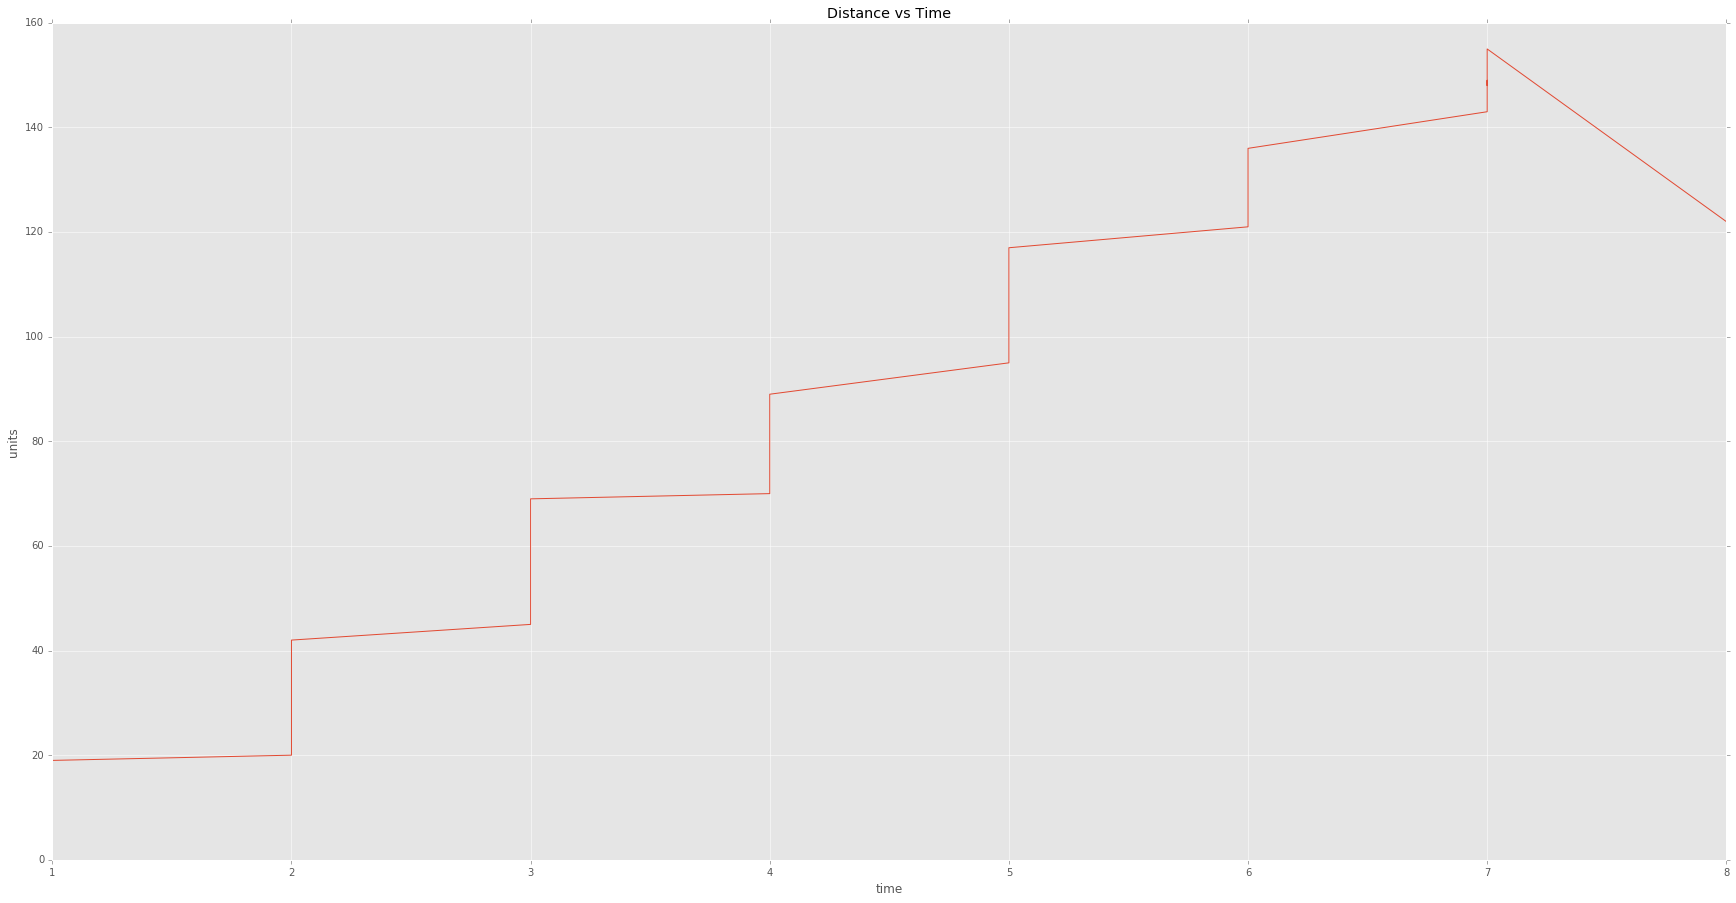

In [27]:
'''
Scatter plot of x, time
'''
plt.figure(figsize=(30,15))

plt.plot(walk_data['time'],walk_data['x'])
plt.title('Distance vs Time')
plt.xlabel('time')
plt.ylabel('units')

In [28]:
'''
Calculate speed
'''
mean_d = np.mean(walk_data['x'])
mean_t = np.mean(walk_data['time'])

speed = mean_d/mean_t

print "The approx. speed of the object is: ", speed, "pixels/sec"

x_min = walk_data['x'][0]
x_max = walk_data['x'][walk_data.shape[0]-1]
direction = "left"

if x_max-x_min > 0:
    direction = "right"
    
print "The direction in which the man is walking is: ", direction

The approx. speed of the object is:  19.6132596685 pixels/sec
The direction in which the man is walking is:  right


# 6. DRAWBACKS

* Thresholding sensitivity and Smoothing kernel are to be manually chosen
* Careful preprocessing required for optimal contour detection